In [1]:
import numpy,sklearn,sklearn.datasets,utils
%matplotlib inline

# Principal Component Analysis

In this exercise, we will experiment with two different techniques to compute the PCA components of a dataset:

* **Standard PCA**: The standard technique based on eigenvalue decomposition.

* **Iterative PCA**: A technique that iteratively optimizes the PCA objective.

We consider a random subset of the Labeled Faces in the Wild (LFW) dataset, readily accessible from sklearn, and we apply some basic preprocessing to discount strong variations of luminosity and contrast.

In [2]:
X = sklearn.datasets.fetch_lfw_people(resize=0.5)['images']
X = X[numpy.random.mtrand.RandomState(1).permutation(len(X))[:150]]*1.0
X = X - X.mean(axis=(1,2),keepdims=True)
X = X / X.std(axis=(1,2),keepdims=True)
print(X.shape)

(150, 62, 47)


Two functions are provided for your convenience and are available in `utils.py` that is included in the zip archive. The functions are the following:

* **`utils.scatterplot`** produces a scatter plot from a two-dimensional data set.

* **`utils.render`** takes an array of data points or objects of similar shape, and renders them in the IPython notebook.

Some demo code that makes use of these functions is given below.

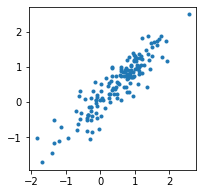

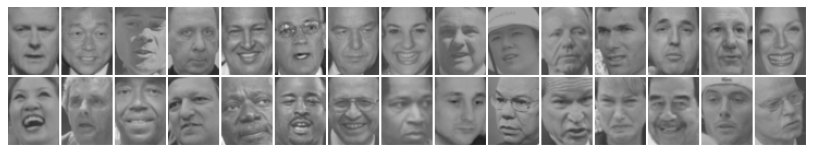

In [3]:
utils.scatterplot(X[:,32,20],X[:,32,21]) # Plot relation between adjacent pixels
utils.render(X[:30],15,2,vmax=5)         # Display first 10 examples in the data

## PCA with Eigenvalue Decomposition (15 P)

Principal components can be found by solving the eigenvalue problem

$$
S \boldsymbol{w} = \lambda \boldsymbol{w}.
$$

where  $S = \sum_{k=1}^N (\boldsymbol{x}_k - \boldsymbol{m}) (\boldsymbol{x}_k - \boldsymbol{m})^\top$ is the scatter matrix, and where $\boldsymbol{m} = \frac1N \sum_{k=1}^N \boldsymbol{x}_k$ is the mean vector.

**Tasks:**

* **Compute the principal components of the data using the function `numpy.linalg.eigh`.**
* **Measure the computational time required to find the principal components. Use the function `time.time()` for that purpose. Do *not* include in your estimate the computation overhead caused by loading the data, plotting and rendering.**
* **Plot the projection of the dataset on the first two principal components using the function `utils.scatterplot`.**
* **Visualize the 60 leading principal components using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, there may be some error in your implementation.

In [20]:
### REPLACE BY YOUR CODE
import time

tini = time.time()

X = X.reshape(len(X),-1)
X -= X.mean(axis=0)
S = numpy.dot(X.T,X)
eigva, eigve = numpy.linalg.eigh(S)

tfin = time.time()
print('Time: %.3f seconds'%(tfin-tini))
###

Time: 3.147 seconds


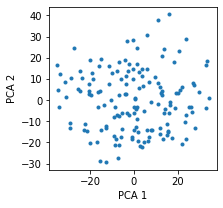

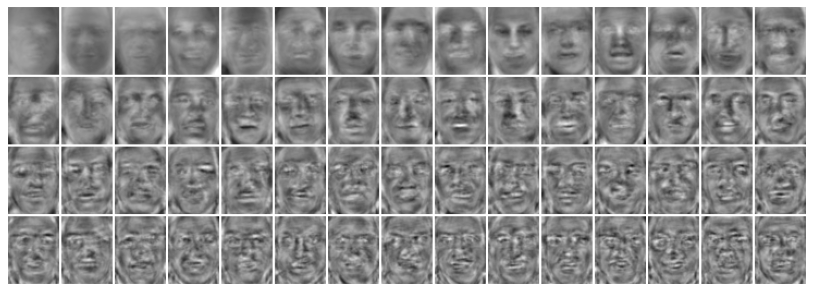

In [19]:
utils.scatterplot(X.dot(eigve[:,-1]),X.dot(eigve[:,-2]),xlabel='PCA 1',ylabel='PCA 2') # Plot relation between adjacent pixels


utils.render(eigve[:,-60:][:,::-1].T,15,4)

When looking at the scatter plot, we observe that much more variance is expressed in the first two principal components than in individual dimensions as it was plotted before. When looking at the principal components themselves which we render as images, we can see that the first principal components correspond to low-frequency filters that select for coarse features, and the following principal components capture progressively higher-frequency information and are also becoming more noisy.

## Iterative PCA (15 P)

The standard PCA method based on eigenvalues is quite expensive to compute. Instead, the power iteration algorithm looks only for the first component and finds it using an iterative procedure. It starts with an initial weight vector $\boldsymbol{w}$, and repeatedly applies the update rule

$$
\boldsymbol{w} \leftarrow S \boldsymbol{w} \,\big/\, \|S \boldsymbol{w}\|.
$$

Like for standard PCA, the objective that iterative PCA optimizes is $J(\boldsymbol{w}) = \boldsymbol{w}^\top S \boldsymbol{w}$ subject to the unit norm constraint for $\boldsymbol{w}$. We can therefore keep track of the progress of the algorithm after each iteration.

**Tasks:**

* **Implement the iterative PCA algorithm. Use as a stopping criterion the value of $J(\boldsymbol{w})$ between two iterations increasing by less than one.**
* **Print the value of the objective function $J(\boldsymbol{w})$ at each iteration.**
* **Measure the time taken to find the principal component.**
* **Visualize the the eigenvector $\boldsymbol{w}$ obtained after convergence using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, there may be some error in your implementation.

In [30]:
### REPLACE BY YOUR CODE
tini = time.time()
X = X.reshape(len(X),-1)
X -= X.mean(axis=0)

w = numpy.random.mtrand.RandomState(346537).normal(0,1,[S.shape[1]])
w = w / (w**2).sum()**.5
S=numpy.dot(X.T,X)

Jold = -float('Inf')
for it in range(100):
    
    Sw = numpy.dot(S,w)
    w = Sw / (Sw**2).sum()**.5
    J = numpy.dot(w,Sw)
    
    if J - Jold < 1:
        break
    Jold = J
    print('iteration %2d J(w)=%10.3f'%(it,J))
tfin = time.time()
print('Time: %.3f seconds'%(tfin-tini))
###

iteration  0 J(w)=   841.603
iteration  1 J(w)= 19861.509
iteration  2 J(w)= 29834.682
iteration  3 J(w)= 31879.577
iteration  4 J(w)= 32753.212
iteration  5 J(w)= 33809.078
iteration  6 J(w)= 35192.619
iteration  7 J(w)= 36782.429
iteration  8 J(w)= 38328.367
iteration  9 J(w)= 39603.554
iteration 10 J(w)= 40519.326
iteration 11 J(w)= 41113.167
iteration 12 J(w)= 41473.024
iteration 13 J(w)= 41682.170
iteration 14 J(w)= 41800.775
iteration 15 J(w)= 41867.099
iteration 16 J(w)= 41903.896
iteration 17 J(w)= 41924.223
iteration 18 J(w)= 41935.424
iteration 19 J(w)= 41941.588
iteration 20 J(w)= 41944.978
iteration 21 J(w)= 41946.841
iteration 22 J(w)= 41947.865
Time: 0.406 seconds


We observe that the computation time has decreased significantly. The difference of performance becomes larger as the number of dimensions increases. We can observe that the principal component is the same (sometimes up to a sign flip) as the one obtained by standard PCA.